In [1]:
import numpy as np
import pandas as pd
import random
import tqdm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns 
import yaml
from pathlib import Path

from util.functions import logistic
from structure_generation.path_connection_gen import ProceduralGraphGenerator, StatsUtils, GraphStructureGenerator




In [2]:
conf = yaml.safe_load(Path('config.yml').read_text())['reachability']

In [3]:
geometric_graph_conf = conf

In [4]:
geometric_graph_conf

{'num_simulation_runs': 30,
 'mean_degrees': [3, 5, 7],
 'nodes': 750,
 'structure_names': ['random_geometric', 'barabasi_albert']}

In [5]:
import multiprocessing, itertools
from typing import Union, Optional, Tuple, List
import networkx as nx 

In [6]:
def run_single_simulation(
    passed_inputs, 
    verbose : bool =  False 
    ):
    """
    Function to run one iteration of the simulation. Need to pass a list instead of arguments to function 
    is so that it can work with pmap.unordered
    """
    mean_degree, structure_name, modality, number_nodes = passed_inputs
    results_dict = {
    }
    if verbose: 
        print(f"simulation run for degree {mean_degree}")
    graphgen = GraphStructureGenerator(
        structure_name=structure_name, 
        num_nodes=number_nodes, 
        target_mean_degree = mean_degree
    )
    graph = graphgen.initial_graph

    x = ProceduralGraphGenerator(graph)
    infection_matrix_list, timesteps_saturation, fraction_infected_list, info_dict = x.infect_till_saturation(
        structure_name = structure_name, modality=modality, verbose= False
    )

    results_dict["timesteps_saturation"] = timesteps_saturation
    results_dict["fraction_infected_list"] = fraction_infected_list
    results_dict["info_dict"] = info_dict

    return results_dict
    
def run_simulation(modality : str, mean_degree : int, structure_name : str) -> list: 
    simulation_run_list = []
    with multiprocessing.Pool(processes=multiprocessing.cpu_count() * 2 - 1) as p:
        iterThis = itertools.repeat(
            [
                mean_degree, 
                structure_name,
                modality, 
                conf['nodes']
            ],
            conf['num_simulation_runs'],
        )
        with tqdm.tqdm(total=conf['num_simulation_runs']) as pbar:
            for _ in p.imap_unordered(run_single_simulation, iterThis):
                pbar.update()
                simulation_run_list.append(_)
    
    #Simulation run lists is a list of dicts we need to merge into a dict of list of lists
    final_dict = {k : [] for k in list(_.keys())}
    for key in final_dict.keys():
        for simulation_dict in simulation_run_list: 
            final_dict[key].append(simulation_dict[key])

    #final_dict['fraction_infected_list'] = np.array(
    #    list(zip(*itertools.zip_longest(*final_dict['fraction_infected_list'], fillvalue=final_dict['fraction_infected_list'][-1])))
    #)

    return final_dict


def plot_results(results_dict : dict, structure_name : str ):
    for iter in results_dict['fraction_infected_list']:
        #print(iter['info_dict'])
        timesteps_list = [x for x in range(len(iter))]
        #try:
        #    p, cov = curve_fit(logistic, timesteps_list, iter)
        #    logistic_curve_data = logistic(timesteps_list, *p)
        #except:
        #    pass
        plt.plot(timesteps_list, iter, )#label = f"average simulated saturation across {len(result['timesteps_saturation'])} runs")
    #plt.plot(timesteps_list, logistic_curve_data, label = "fitted logistic")
    plt.title(
        f"saturation curve for {structure_name}     modality: {results_dict['info_dict'][0]['modality']}    mean degree: {round(results_dict['info_dict'][0]['average_degree'], 2)}")
    
    plt.xlabel("number simulation timesteps")
    plt.ylabel("fraction of giant graph infected")
    plt.legend()
    plt.show()

REVERSABLE GEOMETRIC GRAPH SIMULATION

simulation run for mean degree 3


100%|██████████| 30/30 [00:21<00:00,  1.41it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[{'average_degree': 4.0, 'num_nodes': 83, 'modality': 'reversable', 'clustering_coefficient': 0.5187894434882386, 'degree_assortivity': 0.5347393293449298, 'mean_shortest_pathlength': 8.60476050543638}, {'average_degree': 4.123076923076923, 'num_nodes': 65, 'modality': 'reversable', 'clustering_coefficient': 0.5889377289377289, 'degree_assortivity': 0.47295968534906585, 'mean_shortest_pathlength': 6.39375}, {'average_degree': 4.337662337662338, 'num_nodes': 77, 'modality': 'reversable', 'clustering_coefficient': 0.5161100803957946, 'degree_assortivity': 0.3301472157030083, 'mean_shortest_pathlength': 7.4914559125085445}, {'average_degree': 4.15625, 'num_nodes': 64, 'modality': 'reversable', 'clustering_coefficient': 0.5646205357142857, 'degree_assortivity': 0.3251930528839453, 'mean_shortest_pathlength': 6.727678571428571}, {'average_degree': 4.0, 'num_nodes': 58, 'modality': 'reversable', 'clustering_coefficient': 0.5383415435139572, 'degree_assortivity': 0.6048069070120172, 'mean_sho

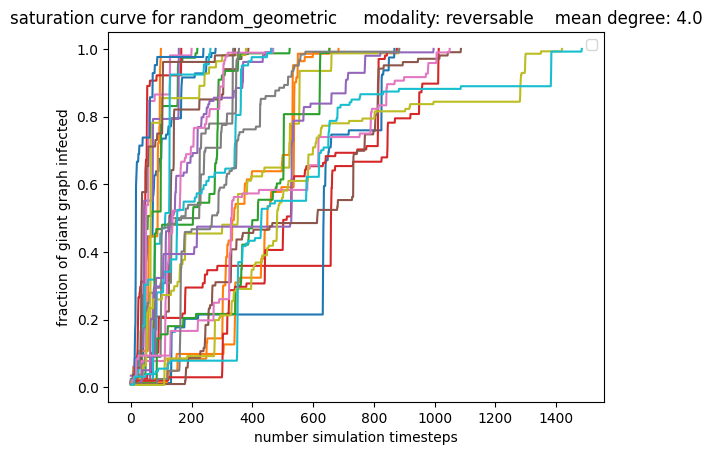

simulation run for mean degree 5


100%|██████████| 30/30 [03:03<00:00,  6.13s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[{'average_degree': 5.2936046511627906, 'num_nodes': 688, 'modality': 'reversable', 'clustering_coefficient': 0.5586517165005535, 'degree_assortivity': 0.6183950289675715, 'mean_shortest_pathlength': 20.75606360651298}, {'average_degree': 5.553488372093023, 'num_nodes': 430, 'modality': 'reversable', 'clustering_coefficient': 0.5825535704605476, 'degree_assortivity': 0.5837871427772598, 'mean_shortest_pathlength': 16.239280099745216}, {'average_degree': 5.19893899204244, 'num_nodes': 377, 'modality': 'reversable', 'clustering_coefficient': 0.595278284933457, 'degree_assortivity': 0.5378680501578301, 'mean_shortest_pathlength': 16.575977763982166}, {'average_degree': 5.220417633410673, 'num_nodes': 431, 'modality': 'reversable', 'clustering_coefficient': 0.562941441131696, 'degree_assortivity': 0.6895119651356374, 'mean_shortest_pathlength': 20.50017806075649}, {'average_degree': 5.282945736434108, 'num_nodes': 516, 'modality': 'reversable', 'clustering_coefficient': 0.5894834278555205,

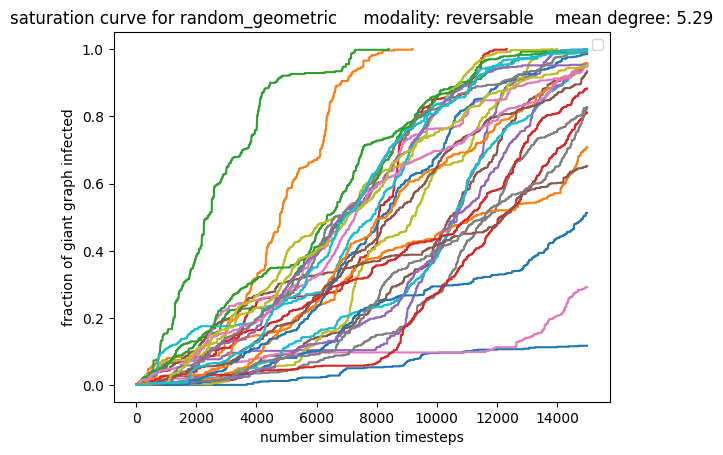

simulation run for mean degree 7


100%|██████████| 30/30 [03:24<00:00,  6.80s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[{'average_degree': 7.202684563758389, 'num_nodes': 745, 'modality': 'reversable', 'clustering_coefficient': 0.5908220978039372, 'degree_assortivity': 0.5775981187657722, 'mean_shortest_pathlength': 13.641495273147147}, {'average_degree': 6.942590120160213, 'num_nodes': 749, 'modality': 'reversable', 'clustering_coefficient': 0.5987407246925616, 'degree_assortivity': 0.6010623873403786, 'mean_shortest_pathlength': 15.516146305591056}, {'average_degree': 7.03364737550471, 'num_nodes': 743, 'modality': 'reversable', 'clustering_coefficient': 0.6140197211193175, 'degree_assortivity': 0.5540329279750813, 'mean_shortest_pathlength': 16.168207855528507}, {'average_degree': 6.955823293172691, 'num_nodes': 747, 'modality': 'reversable', 'clustering_coefficient': 0.5965533648264574, 'degree_assortivity': 0.5752134105732509, 'mean_shortest_pathlength': 15.192408597751147}, {'average_degree': 7.036535859269283, 'num_nodes': 739, 'modality': 'reversable', 'clustering_coefficient': 0.59561040372948

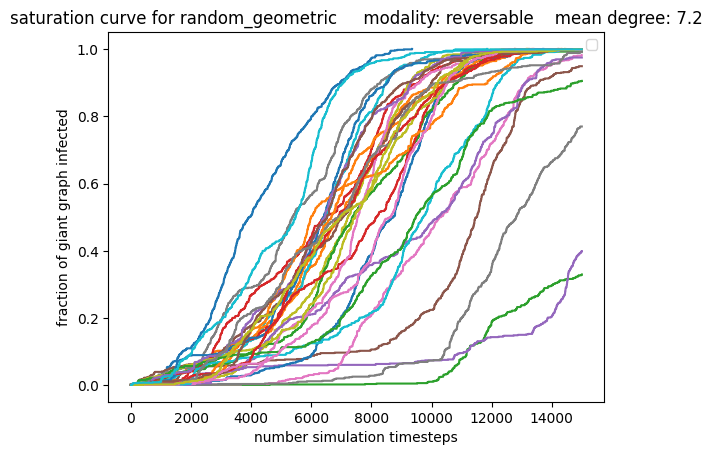

In [7]:
graph_name = "random_geometric"
for degree in conf['mean_degrees']: 
    print(f"simulation run for mean degree {degree}")
    simulation_run = run_simulation("reversable",degree, graph_name)
    print(simulation_run['info_dict'][:5])
    plot_results(simulation_run, graph_name)

IRREVERSABLE GEOMETRIC GRAPH SIMULATION

simulation run for mean degree 3


100%|██████████| 30/30 [00:17<00:00,  1.72it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[{'average_degree': 3.693877551020408, 'num_nodes': 98, 'modality': 'irreversable', 'clustering_coefficient': 0.4963070942662778, 'degree_assortivity': 0.42827291281951607, 'mean_shortest_pathlength': 8.450873132758257}, {'average_degree': 4.285714285714286, 'num_nodes': 70, 'modality': 'irreversable', 'clustering_coefficient': 0.556530612244898, 'degree_assortivity': 0.38212045867814604, 'mean_shortest_pathlength': 7.282815734989648}, {'average_degree': 3.5609756097560976, 'num_nodes': 41, 'modality': 'irreversable', 'clustering_coefficient': 0.46504065040650405, 'degree_assortivity': 0.5541183867780473, 'mean_shortest_pathlength': 5.328048780487805}, {'average_degree': 4.514285714285714, 'num_nodes': 70, 'modality': 'irreversable', 'clustering_coefficient': 0.5325963718820862, 'degree_assortivity': 0.4565168623345547, 'mean_shortest_pathlength': 7.278260869565218}, {'average_degree': 4.101449275362318, 'num_nodes': 138, 'modality': 'irreversable', 'clustering_coefficient': 0.57108350

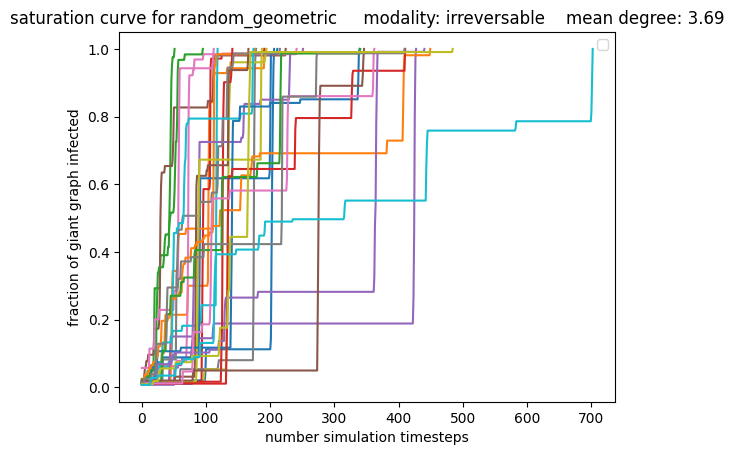

simulation run for mean degree 5


100%|██████████| 30/30 [04:13<00:00,  8.45s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[{'average_degree': 5.46135831381733, 'num_nodes': 427, 'modality': 'irreversable', 'clustering_coefficient': 0.585503671452149, 'degree_assortivity': 0.5862052208604058, 'mean_shortest_pathlength': 19.400314455036227}, {'average_degree': 5.217391304347826, 'num_nodes': 322, 'modality': 'irreversable', 'clustering_coefficient': 0.5949407562761598, 'degree_assortivity': 0.5663556717423113, 'mean_shortest_pathlength': 20.29722722083551}, {'average_degree': 5.304347826086956, 'num_nodes': 391, 'modality': 'irreversable', 'clustering_coefficient': 0.5787906608878475, 'degree_assortivity': 0.604192168524856, 'mean_shortest_pathlength': 16.525647583448094}, {'average_degree': 5.554479418886198, 'num_nodes': 413, 'modality': 'irreversable', 'clustering_coefficient': 0.618433852937485, 'degree_assortivity': 0.553169032145761, 'mean_shortest_pathlength': 18.377441876865934}, {'average_degree': 5.0602409638554215, 'num_nodes': 415, 'modality': 'irreversable', 'clustering_coefficient': 0.59680570

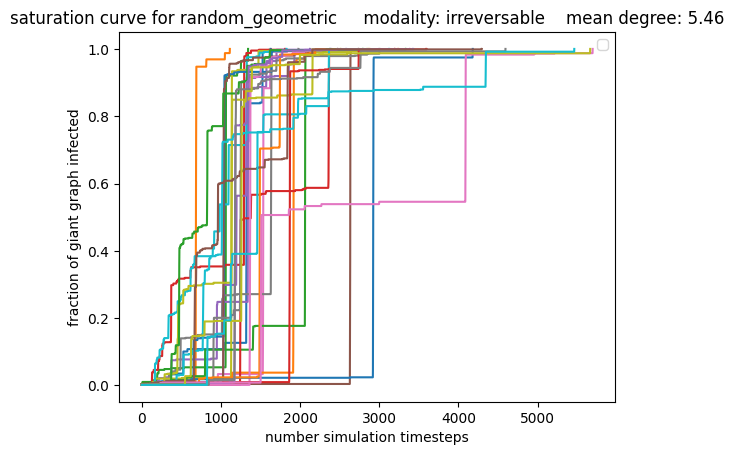

simulation run for mean degree 7


100%|██████████| 30/30 [10:10<00:00, 20.34s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[{'average_degree': 7.036339165545088, 'num_nodes': 743, 'modality': 'irreversable', 'clustering_coefficient': 0.6009275412173046, 'degree_assortivity': 0.6698935737208204, 'mean_shortest_pathlength': 15.002514030320729}, {'average_degree': 6.9411764705882355, 'num_nodes': 748, 'modality': 'irreversable', 'clustering_coefficient': 0.5908574098649597, 'degree_assortivity': 0.5792248913081535, 'mean_shortest_pathlength': 14.251458597312602}, {'average_degree': 6.871313672922252, 'num_nodes': 746, 'modality': 'irreversable', 'clustering_coefficient': 0.5877505128175359, 'degree_assortivity': 0.5340337936395573, 'mean_shortest_pathlength': 14.564424132284937}, {'average_degree': 7.125333333333334, 'num_nodes': 750, 'modality': 'irreversable', 'clustering_coefficient': 0.5944255448255447, 'degree_assortivity': 0.5502273121979695, 'mean_shortest_pathlength': 13.387702714730752}, {'average_degree': 6.92904953145917, 'num_nodes': 747, 'modality': 'irreversable', 'clustering_coefficient': 0.597

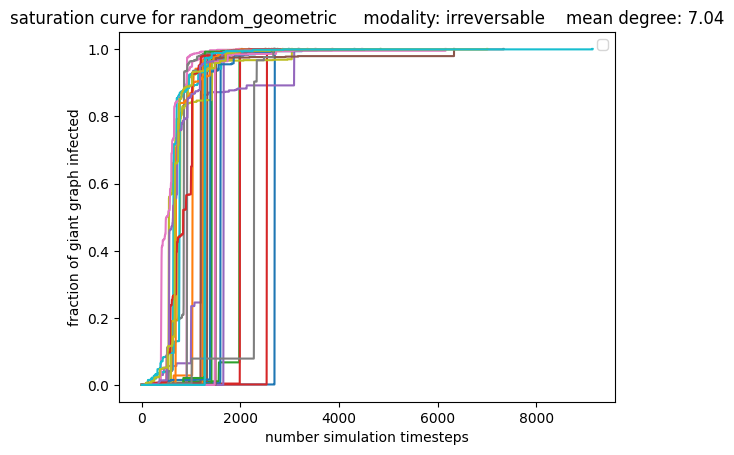

In [9]:
graph_name = "random_geometric"
for degree in conf['mean_degrees']: 
    print(f"simulation run for mean degree {degree}")
    simulation_run = run_simulation("irreversable",degree, graph_name)
    print(simulation_run['info_dict'][:5])
    plot_results(simulation_run, graph_name)

Results for reversable albert simulation 

simulation run for mean degree 3


100%|██████████| 30/30 [01:47<00:00,  3.59s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[{'average_degree': 1.9973333333333334, 'num_nodes': 750, 'modality': 'reversable', 'clustering_coefficient': 0.0, 'degree_assortivity': -0.14601466743466635, 'mean_shortest_pathlength': 7.153117935024477}, {'average_degree': 1.9973333333333334, 'num_nodes': 750, 'modality': 'reversable', 'clustering_coefficient': 0.0, 'degree_assortivity': -0.1503381211428494, 'mean_shortest_pathlength': 6.583497997329773}, {'average_degree': 1.9973333333333334, 'num_nodes': 750, 'modality': 'reversable', 'clustering_coefficient': 0.0, 'degree_assortivity': -0.14995683662403292, 'mean_shortest_pathlength': 6.340179795282599}, {'average_degree': 1.9973333333333334, 'num_nodes': 750, 'modality': 'reversable', 'clustering_coefficient': 0.0, 'degree_assortivity': -0.16328428832792063, 'mean_shortest_pathlength': 7.082175344904317}, {'average_degree': 1.9973333333333334, 'num_nodes': 750, 'modality': 'reversable', 'clustering_coefficient': 0.0, 'degree_assortivity': -0.1385016371350114, 'mean_shortest_path

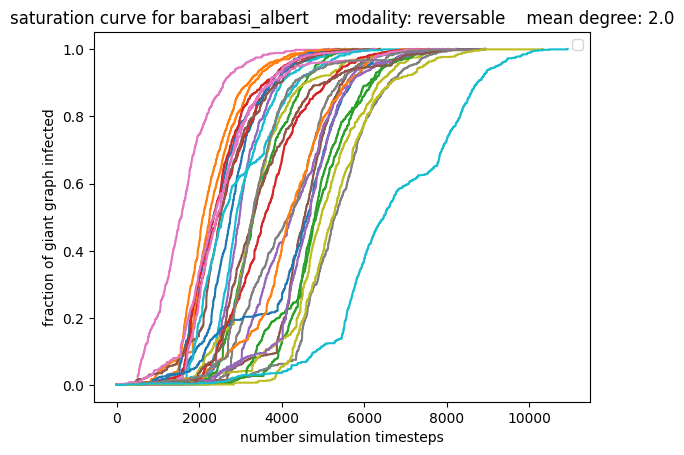

simulation run for mean degree 5


100%|██████████| 30/30 [00:52<00:00,  1.75s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[{'average_degree': 5.976, 'num_nodes': 750, 'modality': 'reversable', 'clustering_coefficient': 0.0277133341832225, 'degree_assortivity': -0.08129818119115101, 'mean_shortest_pathlength': 3.417886960391633}, {'average_degree': 5.976, 'num_nodes': 750, 'modality': 'reversable', 'clustering_coefficient': 0.0334450874337995, 'degree_assortivity': -0.07459324844587345, 'mean_shortest_pathlength': 3.429607476635514}, {'average_degree': 5.976, 'num_nodes': 750, 'modality': 'reversable', 'clustering_coefficient': 0.036373682693922126, 'degree_assortivity': -0.07880180166739208, 'mean_shortest_pathlength': 3.3971980418335557}, {'average_degree': 5.976, 'num_nodes': 750, 'modality': 'reversable', 'clustering_coefficient': 0.041280955726079205, 'degree_assortivity': -0.08509699917629873, 'mean_shortest_pathlength': 3.3634534935469516}, {'average_degree': 5.976, 'num_nodes': 750, 'modality': 'reversable', 'clustering_coefficient': 0.041125343493088724, 'degree_assortivity': -0.0827366370728173, 

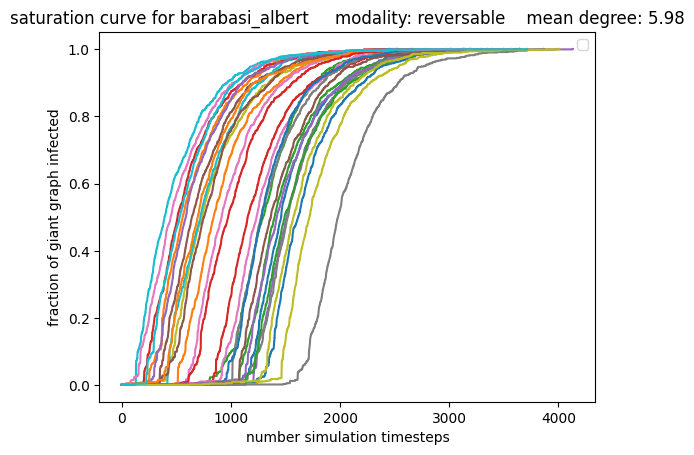

simulation run for mean degree 7


100%|██████████| 30/30 [01:08<00:00,  2.28s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[{'average_degree': 5.976, 'num_nodes': 750, 'modality': 'reversable', 'clustering_coefficient': 0.04197235803593224, 'degree_assortivity': -0.09659216446911642, 'mean_shortest_pathlength': 3.348735202492212}, {'average_degree': 5.976, 'num_nodes': 750, 'modality': 'reversable', 'clustering_coefficient': 0.040392167707379203, 'degree_assortivity': -0.0895362503084091, 'mean_shortest_pathlength': 3.3763809523809525}, {'average_degree': 5.976, 'num_nodes': 750, 'modality': 'reversable', 'clustering_coefficient': 0.0449881608128871, 'degree_assortivity': -0.07410118412703644, 'mean_shortest_pathlength': 3.354737872719181}, {'average_degree': 5.976, 'num_nodes': 750, 'modality': 'reversable', 'clustering_coefficient': 0.04137894179895855, 'degree_assortivity': -0.07922612339686197, 'mean_shortest_pathlength': 3.4158041833555854}, {'average_degree': 5.976, 'num_nodes': 750, 'modality': 'reversable', 'clustering_coefficient': 0.04218138154724694, 'degree_assortivity': -0.08346220117519962, '

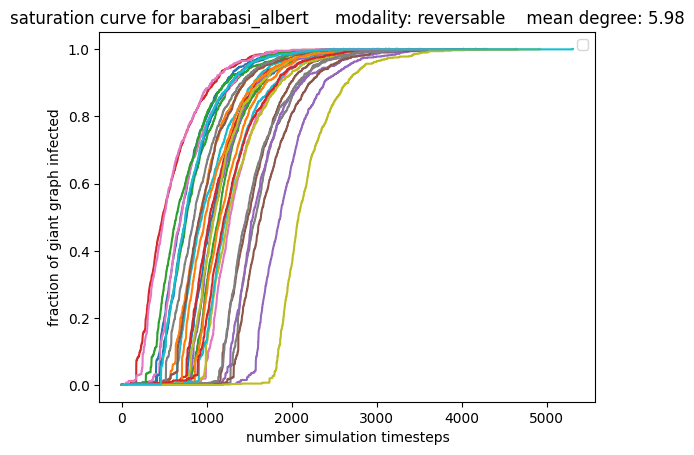

In [11]:
graph_name = "barabasi_albert"
for degree in conf['mean_degrees']: 
    print(f"simulation run for mean degree {degree}")
    simulation_run = run_simulation("reversable",degree, graph_name)
    print(simulation_run['info_dict'][:30])
    plot_results(simulation_run, graph_name)

Results for irreversable albert simulation 

simulation run for mean degree 3


100%|██████████| 30/30 [01:50<00:00,  3.69s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[{'average_degree': 1.9973333333333334, 'num_nodes': 750, 'modality': 'irreversable', 'clustering_coefficient': 0.0, 'degree_assortivity': -0.12889776523693405, 'mean_shortest_pathlength': 6.490826880284824}, {'average_degree': 1.9973333333333334, 'num_nodes': 750, 'modality': 'irreversable', 'clustering_coefficient': 0.0, 'degree_assortivity': -0.09085654994191508, 'mean_shortest_pathlength': 7.227246995994659}, {'average_degree': 1.9973333333333334, 'num_nodes': 750, 'modality': 'irreversable', 'clustering_coefficient': 0.0, 'degree_assortivity': -0.166780889721448, 'mean_shortest_pathlength': 7.119800623052959}, {'average_degree': 1.9973333333333334, 'num_nodes': 750, 'modality': 'irreversable', 'clustering_coefficient': 0.0, 'degree_assortivity': -0.12884691429145223, 'mean_shortest_pathlength': 6.327604806408544}, {'average_degree': 1.9973333333333334, 'num_nodes': 750, 'modality': 'irreversable', 'clustering_coefficient': 0.0, 'degree_assortivity': -0.1559583544967181, 'mean_shor

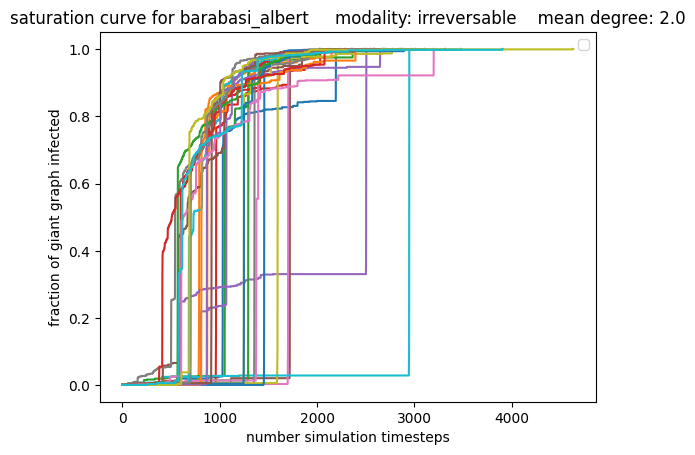

simulation run for mean degree 5


100%|██████████| 30/30 [03:45<00:00,  7.51s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[{'average_degree': 5.976, 'num_nodes': 750, 'modality': 'irreversable', 'clustering_coefficient': 0.04536773102822356, 'degree_assortivity': -0.09112987180724966, 'mean_shortest_pathlength': 3.3728811748998666}, {'average_degree': 5.976, 'num_nodes': 750, 'modality': 'irreversable', 'clustering_coefficient': 0.04270538000548537, 'degree_assortivity': -0.08436067184707488, 'mean_shortest_pathlength': 3.3934597240765467}, {'average_degree': 5.976, 'num_nodes': 750, 'modality': 'irreversable', 'clustering_coefficient': 0.03806651295158887, 'degree_assortivity': -0.08599696909711804, 'mean_shortest_pathlength': 3.4112861593235424}, {'average_degree': 5.976, 'num_nodes': 750, 'modality': 'irreversable', 'clustering_coefficient': 0.04072987626022783, 'degree_assortivity': -0.09853495724054409, 'mean_shortest_pathlength': 3.3663088562527816}, {'average_degree': 5.976, 'num_nodes': 750, 'modality': 'irreversable', 'clustering_coefficient': 0.036374491386283125, 'degree_assortivity': -0.098071

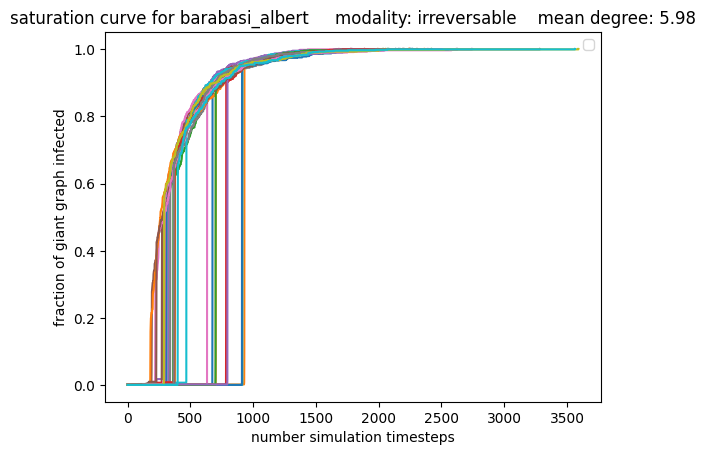

simulation run for mean degree 7


100%|██████████| 30/30 [03:18<00:00,  6.61s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[{'average_degree': 5.976, 'num_nodes': 750, 'modality': 'irreversable', 'clustering_coefficient': 0.03167531519566784, 'degree_assortivity': -0.08875777922928466, 'mean_shortest_pathlength': 3.403798842901647}, {'average_degree': 5.976, 'num_nodes': 750, 'modality': 'irreversable', 'clustering_coefficient': 0.03449419197715494, 'degree_assortivity': -0.062484473965041094, 'mean_shortest_pathlength': 3.4430298175344904}, {'average_degree': 5.976, 'num_nodes': 750, 'modality': 'irreversable', 'clustering_coefficient': 0.044098820375307525, 'degree_assortivity': -0.0888246704055226, 'mean_shortest_pathlength': 3.3464886515353807}, {'average_degree': 5.976, 'num_nodes': 750, 'modality': 'irreversable', 'clustering_coefficient': 0.046499187838449356, 'degree_assortivity': -0.10190816966154512, 'mean_shortest_pathlength': 3.342052514463729}, {'average_degree': 5.976, 'num_nodes': 750, 'modality': 'irreversable', 'clustering_coefficient': 0.03620495809748163, 'degree_assortivity': -0.0824134

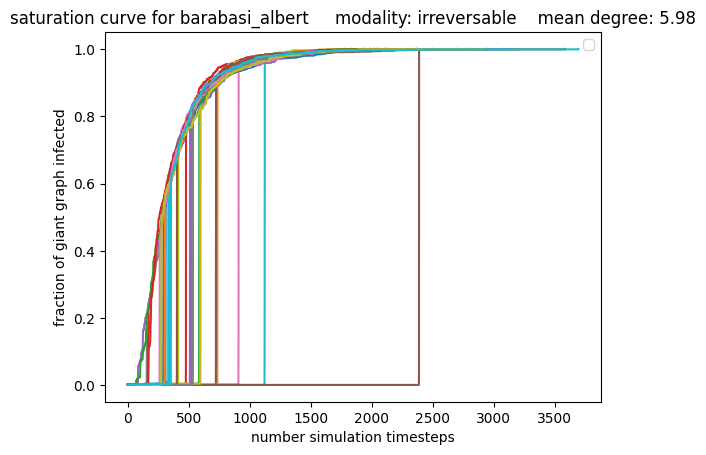

In [12]:
graph_name = "barabasi_albert"
for degree in conf['mean_degrees']: 
    print(f"simulation run for mean degree {degree}")
    simulation_run = run_simulation("irreversable",degree, graph_name)
    print(simulation_run['info_dict'][:30])
    plot_results(simulation_run, graph_name)